In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
retail_store_sales_cleaned = pd.read_csv("retail_store_sales_cleaned.csv")
retail_store_sales_cleaned.head()


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,txn_6867343,cust_09,patisserie,item_10_pat,18.5,10.0,185.0,digital wallet,online,2024-04-08,True
1,txn_3731986,cust_22,milk products,item_17_milk,29.0,9.0,261.0,digital wallet,online,2023-07-23,True
2,txn_9303719,cust_02,butchers,item_12_but,21.5,2.0,43.0,credit card,online,2022-10-05,False
3,txn_9458126,cust_06,beverages,item_16_bev,27.5,9.0,247.5,credit card,online,2022-05-07,True
4,txn_4575373,cust_05,food,item_6_food,12.5,7.0,87.5,digital wallet,online,2022-10-02,False


In [7]:
retail_store_sales_cleaned['Transaction Date'] = pd.to_datetime(retail_store_sales_cleaned['Transaction Date'])


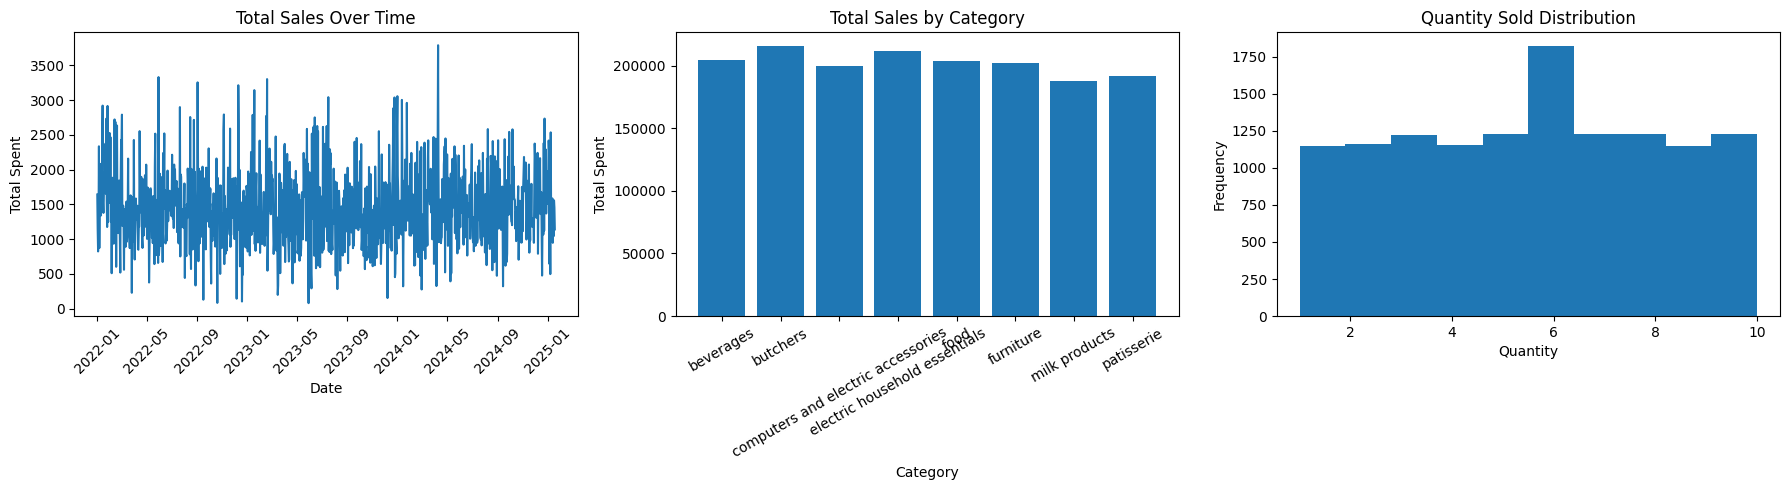

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

daily_sales = (retail_store_sales_cleaned.groupby('Transaction Date')['Total Spent'].sum()
)

ax[0].plot(daily_sales.index, daily_sales.values)
ax[0].set_title("Total Sales Over Time")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Total Spent")
ax[0].tick_params(axis='x', rotation=45)

category_sales = (retail_store_sales_cleaned.groupby('Category')['Total Spent'].sum())

ax[1].bar(category_sales.index, category_sales.values)
ax[1].set_title("Total Sales by Category")
ax[1].set_xlabel("Category")
ax[1].set_ylabel("Total Spent")
ax[1].tick_params(axis='x', rotation=30)

ax[2].hist(retail_store_sales_cleaned['Quantity'])
ax[2].set_title("Quantity Sold Distribution")
ax[2].set_xlabel("Quantity")
ax[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()
